# EDA

# The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading the data

In [2]:
!pip install -q openpyxl

In [3]:
df= pd.read_excel('/data/notebook_files/Supplemental_PostSurvey_Data.xlsx')
df_2 = df.copy()

# EDA

Now let's take a look at the data and have some key visualizations according to the features

In [4]:
df.head(4)

,Unnamed: 0,StartDate,EndDate,Q4_Area,Q4_Area_Other,Q5_Year,Q5_Year_Other,Q6_Gender,Q7_Ethnicity,Q12_LinkedIn_Connect,...,Q20_LinkedIn_UseProf,Q20_LinkedIn_UseJob,Q20_LinkedIn_UseCareer,Q20_LinkedIn_UseNetwork,Q20_LinkedIn_UseContacts,Q20_LinkedIn_UseValue,Q22_LinkedIn_FreqYear,Q23_LinkedIn_FreqSenior,Q24_LinkedIn_FreqCareer,Q17_Comments
0,2,10/29/2021 8:22,10/29/2021 8:25,Business,NaN,Junior,NaN,Male,Caucasian,51-100,...,Agree,Agree,Strongly agree,Disagree,Agree,Agree,I will use it less often than during this assi...,I will use it less often than during this assi...,I will use it about the same amount as during ...,NaN
1,3,10/29/2021 8:22,10/29/2021 8:25,Business,NaN,Sophomore,NaN,Female,Caucasian,51-100,...,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Agree,I will use it about the same amount as during ...,I will use it about the same amount as during ...,I will use it about the same amount as during ...,NaN
2,4,10/29/2021 8:22,10/29/2021 8:26,Business,NaN,Junior,NaN,Female,Caucasian,51-100,...,Strongly agree,Agree,Agree,Strongly agree,Disagree,Agree,I will use it less often than during this assi...,I will use it about the same amount as during ...,I will use it less often than during this assi...,NaN
3,5,10/29/2021 8:22,10/29/2021 8:26,Arts & Sciences,Bio Chem,Junior,NaN,Male,Caucasian,26-50,...,Agree,Agree,Agree,Agree,Agree,Agree,I will use it less often than during this assi...,I will use it about the same amount as during ...,I will use it more often than during this assi...,LinkedIn seems like it would be very helpful w...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  73 non-null     int64 
 1   StartDate                   73 non-null     object
 2   EndDate                     73 non-null     object
 3   Q4_Area                     73 non-null     object
 4   Q4_Area_Other               7 non-null      object
 5   Q5_Year                     73 non-null     object
 6   Q5_Year_Other               4 non-null      object
 7   Q6_Gender                   73 non-null     object
 8   Q7_Ethnicity                73 non-null     object
 9   Q12_LinkedIn_Connect        73 non-null     object
 10  Q15_LinkedIn_Features       73 non-null     object
 11  Q19_LinkedIn_TaskManage     72 non-null     object
 12  Q19_LinkedIn_TaskIntro      72 non-null     object
 13  Q19_LinkedIn_TaskProf       72 non-null     object
 

Even though it is a short dataset (73 entries), it will help us make useful analysis for:

1.Usage patterns

2.Students’ profiles

3.Latent dimentions ( )

In [6]:
#Lets see how many student are in terms of the year they are coursing
df['Q5_Year'].value_counts()

Q5_Year
Junior 23
Senior 20
Sophomore 19
Freshman 11
Name: count, dtype: int64

In [7]:
#See the variety of ethnicity withinh the group of students
df['Q7_Ethnicity'].unique()

array(['Caucasian', 'Asian American', 'Hispanic/Latino', 'Other',
 'Mixed race', 'African American'], dtype=object)

In [8]:
# Now lets visualize the frequency and importance of words in the Q17_Comments feature

In [9]:
!pip install -q wordcloud

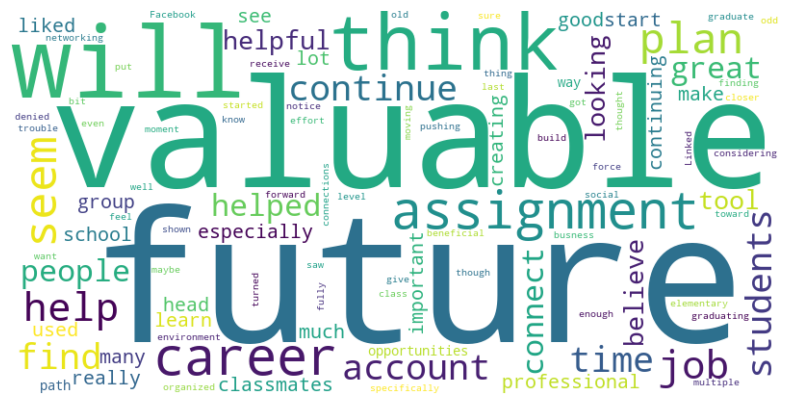

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# 1. Combine all comments into one large string, ignoring null values
text = " ".join(comment for comment in df.Q17_Comments.dropna())

# 2. This prevents generic words from dominating the cloud
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["LinkedIn", "use", "student", "using"])

# 3. Create and generate the word cloud image
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords,
    max_words=100,
    colormap='viridis' 
).generate(text)

# 4. Display the generated image
wordcloud_image = wordcloud.to_image()

fig = plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis("off")
fig.savefig('wordcloud_linkedin.png', dpi=150, bbox_inches='tight')
plt.show()

Since future and valuable are the primary anchors words within the comments, they can be interpreted as:

1. ***Valuable*** indicates an ***Investment Mindset***, LinkedIn is not seen as a fun social media for the students; they see it as a **utility**, they are investing their time looking for high-quality content or high_impact connections rather than entertainment.
   
2. ***Future*** indicates an ***Aspiration Mindset***; students are looking for what they will become, not necessarily what they are now, they are likely building their profiles in anticipation of job hunting or internships.

Now let's validate this interpretation with other features, for valuable we will check 'Q18_LinkedIn_Professional' and for future 'Q24_LinkedIn_FreqCareer'

In [11]:
df['Q18_LinkedIn_Professional'].value_counts()

Q18_LinkedIn_Professional
Very likely 37
Likely 33
Neither likely nor unlikely 2
Unlikely 1
Name: count, dtype: int64

96% of the students find LinkedIn a valuable tool for professionalism due to the high scores for "very likely" and "Likely"

In [12]:
df['Q24_LinkedIn_FreqCareer'].value_counts()

Q24_LinkedIn_FreqCareer
I will use it more often than during this assignment 35
I will use it about the same amount as during this assignment 21
I will use it less often than during this assignment 16
I won't use it at all 1
Name: count, dtype: int64

77% of the students will use LinkedIn more often or at least the same time after took the course, it could indicates that they will seek for jobs and they are anticipating for what will be their future status in the workforce environment.

# ***Insight:*** Students recognize the value of LinkedIn but are focused on the long-term.